In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from parrot import Parrot
import truecase

import re
import heapq

import nltk
parrot = Parrot(model_tag="prithivida/parrot_paraphraser_on_T5")

In [2]:
# load text file
with open('Input.txt', 'r') as f:
    file_data = f.read()

# view text data
#print(file_data)

In [3]:
text = file_data
text = re.sub(r'\[[0-9]*\]',' ',text) # replace reference number i.e. [1], [10], [20] with empty space, if any..
text = re.sub(r'\s+',' ',text) # replace one or more spaces with single space
print(text)

In an attempt to scale up its AI portfolio, Apple has acquired Spain-based AI video startup — Vilynx for approximately $50 million. Reported by Bloomberg, the AI startup — Vilynx is headquartered in Barcelona, which is known to build software using computer vision to analyse a video’s visual, text, and audio content with the goal of “understanding” what’s in the video. This helps it categorising and tagging metadata to the videos, as well as generate automated video previews, and recommend related content to users, according to the company website. Apple told the media that the company typically acquires smaller technology companies from time to time, and with the recent buy, the company could potentially use Vilynx’s technology to help improve a variety of apps. According to the media, Siri, search, Photos, and other apps that rely on Apple are possible candidates as are Apple TV, Music, News, to name a few that are going to be revolutionised with Vilynx’s technology. With CEO Tim Coo

In [4]:
# generate clean text
clean_text = text.lower() # convert all uppercase characters into lowercase characters

# replace characters other than [a-zA-Z0-9], digits & one or more spaces with single space
regex_patterns = [r'\W',r'\d',r'\s+']
for regex in regex_patterns:
    clean_text = re.sub(regex,' ',clean_text)

print(clean_text)

in an attempt to scale up its ai portfolio apple has acquired spain based ai video startup vilynx for approximately million reported by bloomberg the ai startup vilynx is headquartered in barcelona which is known to build software using computer vision to analyse a video s visual text and audio content with the goal of understanding what s in the video this helps it categorising and tagging metadata to the videos as well as generate automated video previews and recommend related content to users according to the company website apple told the media that the company typically acquires smaller technology companies from time to time and with the recent buy the company could potentially use vilynx s technology to help improve a variety of apps according to the media siri search photos and other apps that rely on apple are possible candidates as are apple tv music news to name a few that are going to be revolutionised with vilynx s technology with ceo tim cook s vision of the potential of a

In [5]:
# split (tokenize) the sentences
sentences = nltk.sent_tokenize(text)
print(sentences)

['In an attempt to scale up its AI portfolio, Apple has acquired Spain-based AI video startup — Vilynx for approximately $50 million.', 'Reported by Bloomberg, the AI startup — Vilynx is headquartered in Barcelona, which is known to build software using computer vision to analyse a video’s visual, text, and audio content with the goal of “understanding” what’s in the video.', 'This helps it categorising and tagging metadata to the videos, as well as generate automated video previews, and recommend related content to users, according to the company website.', 'Apple told the media that the company typically acquires smaller technology companies from time to time, and with the recent buy, the company could potentially use Vilynx’s technology to help improve a variety of apps.', 'According to the media, Siri, search, Photos, and other apps that rely on Apple are possible candidates as are Apple TV, Music, News, to name a few that are going to be revolutionised with Vilynx’s technology.', 

In [6]:
# get stop words list
stop_words = nltk.corpus.stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [7]:
# create an empty dictionary to house the word count
word_count = {}

# loop through tokenized words, remove stop words and save word count to dictionary
for word in nltk.word_tokenize(clean_text):
    # remove stop words
    if word not in stop_words:
        # save word count to dictionary
        if word not in word_count.keys():
            word_count[word] = 1
        else:
            word_count[word] += 1

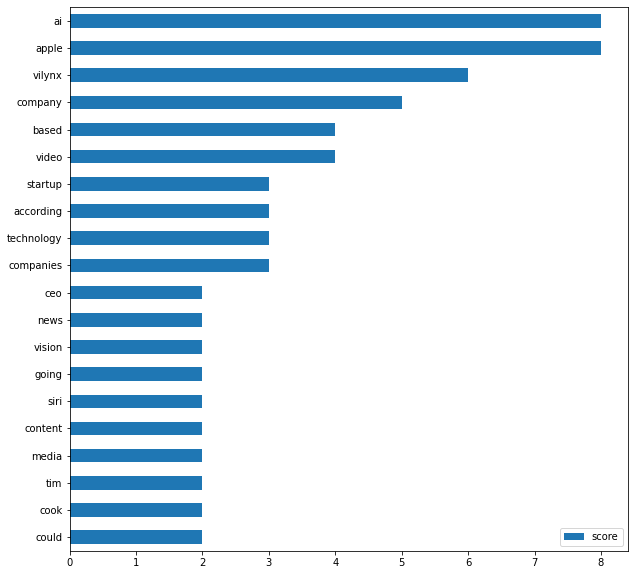

In [8]:
# helper function for plotting the top words.
def plot_top_words(word_count_dict, show_top_n=20):
    """
    Plot top words
    
    INPUT:
    word_count_dict - dict. word count housed in a dictionary
    show_top_n - int. top n words to display (default 20)
    
    OUTPUT:
    Plot with top n words
    
    """
    word_count_table = pd.DataFrame.from_dict(word_count_dict, orient = 'index').rename(columns={0: 'score'})
    word_count_table.sort_values(by='score').tail(show_top_n).plot(kind='barh', figsize=(10,10))
    plt.show()

plot_top_words(word_count, 20)

In [9]:
# create empty dictionary to house sentence score    
sentence_score = {}

# loop through tokenized sentence, only take sentences that have less than 30 words, then add word score to form sentence score
for sentence in sentences:
    # check if word in sentence is in word_count dictionary
    for word in nltk.word_tokenize(sentence.lower()):
        if word in word_count.keys():
            # only take sentence that has less than 30 words
            if len(sentence.split(' ')) < 38:
                # add word score to sentence score
                if sentence not in sentence_score.keys():
                    sentence_score[sentence] = word_count[word]
                else:
                    sentence_score[sentence] += word_count[word]

In [10]:
df_sentence_score = pd.DataFrame.from_dict(sentence_score, orient = 'index').rename(columns={0: 'score'})
df_sentence_score.sort_values(by='score', ascending = False)

,score
"Apple told the media that the company typically acquires smaller technology companies from time to time, and with the recent buy, the company could potentially use Vilynx’s technology to help improve a variety of apps.",58
"According to the media, Siri, search, Photos, and other apps that rely on Apple are possible candidates as are Apple TV, Music, News, to name a few that are going to be revolutionised with Vilynx’s technology.",47
"In an attempt to scale up its AI portfolio, Apple has acquired Spain-based AI video startup — Vilynx for approximately $50 million.",44
"With CEO Tim Cook’s vision of the potential of augmented reality, the company could also make use of AI-based tools like Vilynx.",31
"With its habit of quietly purchasing smaller companies, Apple is making a mark in the AI space.",28
"This helps it categorising and tagging metadata to the videos, as well as generate automated video previews, and recommend related content to users, according to the company website.",27
"In 2018, CEO Tim Cook said in an interview that the company had bought 20 companies over six months, while only six were public knowledge.",25


In [11]:
# get the best 3 sentences for summary             
best_sentences = heapq.nlargest(10, sentence_score, key=sentence_score.get)

In [12]:
print('SUMMARY')


# display top sentences based on their sentence sequence in the original text
for sentence in sentences:
    if sentence in best_sentences:
        #print (sentence)
        print("-"*100)
        print("Input_phrase: ", sentence)
        
        para_phrases = parrot.augment(input_phrase=sentence, use_gpu=False)
        if para_phrases[0][0] == sentence:
            print("Modif_phrase: ", truecase.get_true_case(para_phrases[0][0]) + "(NO CHANGE)")
        else:
            print("Modif_phrase: ", truecase.get_true_case(para_phrases[0][0]))
        
        # for para_phrase in para_phrases:
        #     print(para_phrase)

SUMMARY
----------------------------------------------------------------------------------------------------
Input_phrase:  In an attempt to scale up its AI portfolio, Apple has acquired Spain-based AI video startup — Vilynx for approximately $50 million.


C:\Users\alexi\anaconda3\envs\AI\lib\site-packages\transformers\tokenization_utils_base.py:2259: FutureWarning: The `truncation_strategy` argument is deprecated and will be removed in a future version, use `truncation=True` to truncate examples to a max length. You can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to truncate to the maximal input size of the model (e.g. 512 for Bert).  If you have pairs of inputs, you can give a specific truncation strategy selected among `truncation='only_first'` (will only truncate the first sentence in the pairs) `truncation='only_second'` (will only truncate the second sentence in the pairs) or `truncation='longest_first'` (will iteratively remove tokens from the longest sentence in the pairs).
  warnings.warn(


Modif_phrase:  Apple acquired the Spanish ai Video startup Vilynx for approximately 50 million in an attempt to scale up its ai portfolio
----------------------------------------------------------------------------------------------------
Input_phrase:  This helps it categorising and tagging metadata to the videos, as well as generate automated video previews, and recommend related content to users, according to the company website.
Modif_phrase:  This helps it Categorising and tagging Metadata to the videos, as well as generate automated Video previews, and recommend related content to users, according to the company Website.(NO CHANGE)
----------------------------------------------------------------------------------------------------
Input_phrase:  Apple told the media that the company typically acquires smaller technology companies from time to time, and with the recent buy, the company could potentially use Vilynx’s technology to help improve a variety of apps.
Modif_phrase:  The 